<a id=top-page></a>
# Cost function rankings of data preprocessing strategies

In this notebook, we explore the rankings of different training data preprocessing strategies in their capacity to produce quality low-dimensional projections using PCA.

The analysis in this notebook is performed in the following steps:

- [Results for the plasma physics data](#argon-plasma)
    - [Load the plasma physics data](#load-argon-plasma-data)
    - [Visualize rankings of different data preprocessing strategies](#argon-plasma-ranking)
- [Results for the reacting flow data](#reacting-flow)
    - [Load the reacting flow data](#load-reacting-flow-data)
    - [Results for 2D manifolds](#reacting-flow-2D-results)
    - [Results for 3D manifolds](#reacting-flow-3D-results)
    - [Visualize 2D PCA projection resulting from Level scaling only](#reacting-flow-2D-level)
    - [Visualize 2D PCA projection resulting from $\langle -1, 1 \rangle$ scaling only](#reacting-flow-2D--1to1)
    - [Visualize 2D PCA projection resulting from VAST scaling only](#reacting-flow-2D-vast)
    - [Visualize rankings of different data preprocessing strategies](#reacting-flow-ranking)
    
***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
bandwidth_values = np.logspace(-7, 3, 200)
penalty = 'log-sigma-over-peak'
norm = 'cumulative'
power = 1
colormap = 'plasma'

In [3]:
tex_scalings_list = ['None', 'Auto', 'Pareto', 'VAST', 'Range', '$\\langle 0, 1 \\rangle$', '$\\langle -1, 1 \\rangle$', 'Level', 'Max', 'Poisson']
scalings_list = ['None', 'Auto', 'Pareto', 'VAST', 'Range', '0to1', '-1to1', 'Level', 'Max', 'Poisson']

<a id=argon-plasma></a>
***

## Results for the plasma physics data

[Go to the top](#top-page)

<a id=load-argon-plasma-data></a>

### Load the plasma physics data

[Go to the top](#top-page)

In [4]:
X = pd.read_csv('../data/plasma-physics-argon-plasma-state-space.csv', header=None).to_numpy()
X_names = pd.read_csv('../data/plasma-physics-argon-plasma-state-space-names.csv', header=None).to_numpy().ravel()

target_variables_idx = [0, 1, 2, 3]
target_variables = X[:,target_variables_idx]
target_variables_names = X_names[target_variables_idx]

(n_observations, n_variables) = np.shape(X)

<a id=argon-plasma-ranking></a>
### Visualize rankings of different data preprocessing strategies

[Go to the top](#top-page)

3
9


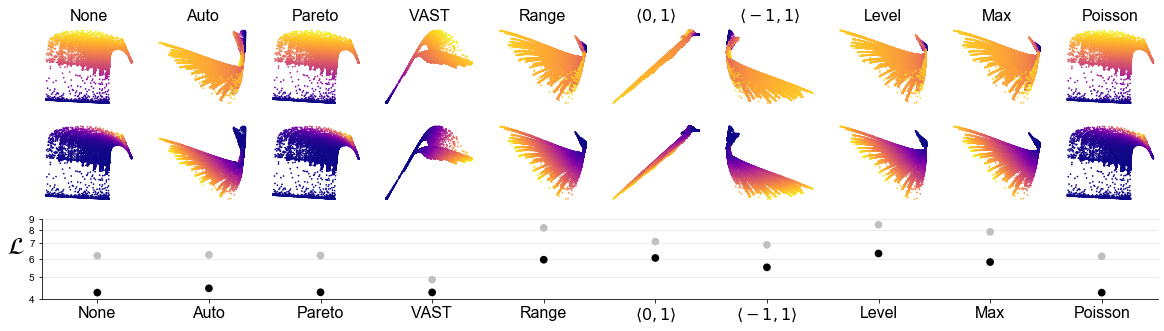

In [5]:
costs_pure_scaling_2D = pd.read_csv('../results/PAPER-argon-plasma-perc-of-data-50-2D-LDM-optimizing-on-Th-Te-electron-Ar(1)-pure-scaling-cost-cumulative.csv', header=None).to_numpy().ravel()
costs_pure_scaling_3D = pd.read_csv('../results/PAPER-argon-plasma-perc-of-data-50-3D-LDM-optimizing-on-Th-Te-electron-Ar(1)-pure-scaling-cost-cumulative.csv', header=None).to_numpy().ravel()

(best_scaling_2D, ) = np.where(costs_pure_scaling_2D==np.min(costs_pure_scaling_2D))
best_scaling_2D = int(best_scaling_2D)

print(best_scaling_2D)

(best_scaling_3D, ) = np.where(costs_pure_scaling_3D==np.min(costs_pure_scaling_3D))
best_scaling_3D = int(best_scaling_3D)

print(best_scaling_3D)

fig = plt.figure(figsize=(len(tex_scalings_list)*2, 5))
fig.tight_layout(pad=-30)
widths = [1 for i in tex_scalings_list]
heights = [1, 1, 1]
spec = fig.add_gridspec(ncols=len(tex_scalings_list), nrows=3, width_ratios=widths, height_ratios=heights)

x_range = np.array([i for i in range(0,len(tex_scalings_list))])

idx = np.zeros((n_observations,)).astype(int)
sample_random = preprocess.DataSampler(idx, random_seed=random_seed, verbose=False)
(idx_test, _) = sample_random.random(50)

for i, scaling in enumerate(scalings_list):

    pca = reduction.PCA(X, scaling=scaling, n_components=3)
    PCs = pca.transform(X)

    ax = fig.add_subplot(spec[0,i:i+1])
    ax.scatter(PCs[idx_test,0], PCs[idx_test,1], c=X[idx_test,1], s=0.5, cmap='plasma')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    ax.set_title(tex_scalings_list[i], fontsize=16)

    ax = fig.add_subplot(spec[1,i:i+1])
    ax.scatter(PCs[idx_test,0], PCs[idx_test,1], c=X[idx_test,2], s=0.5, cmap='plasma')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    
ax = fig.add_subplot(spec[2,0:len(tex_scalings_list)])
plt.scatter(x_range, costs_pure_scaling_2D, c='#c0c0c0', marker='o', s=60, edgecolor='none', alpha=1, zorder=2)
plt.scatter(x_range, costs_pure_scaling_3D, c='k', marker='o', s=60, edgecolor='none', alpha=1, zorder=2)
plt.xticks(x_range, tex_scalings_list, fontsize=16)
plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])
ax.set_yscale('log')
ax.set_yticks([4,5,6,7,8,9])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([4,9])
plt.ylabel('$\mathcal{L}$', fontsize=24, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)

plt.savefig('../figures/scalings-ranking-argon-plasma.png', dpi=200, bbox_inches='tight')

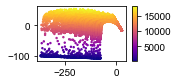

In [6]:
plt.figure(figsize=(2,1))
plt.scatter(PCs[idx_test,0],PCs[idx_test,1], c=X[idx_test,1], s=2, cmap='plasma')
plt.colorbar(aspect=10)
plt.savefig('../figures/plasma-Te-cbar.png', dpi=200, bbox_inches='tight')

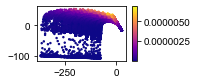

In [7]:
plt.figure(figsize=(2,1))
plt.scatter(PCs[idx_test,0],PCs[idx_test,1], c=X[idx_test,2], s=2, cmap='plasma')
plt.colorbar(aspect=10)
plt.savefig('../figures/plasma-e-cbar.png', dpi=200)

<a id=reacting-flow></a>
***

## Results for the reacting flow data

[Go to the top](#top-page)

<a id=load-reacting-flow-data></a>

### Load the reacting flow data

[Go to the top](#top-page)

In [8]:
state_space = pd.read_csv('../data/reacting-flow-syngas-air-steady-state-space.csv', header=None).to_numpy()
state_space_sources = pd.read_csv('../data/reacting-flow-syngas-air-steady-state-space-sources.csv', header=None).to_numpy()
state_space_names = list(pd.read_csv('../data/reacting-flow-syngas-air-steady-state-space-names.csv', header=None).to_numpy().ravel())

# Remove N2 mass fraction:
state_space = np.delete(state_space, np.s_[-1], axis=1)
state_space_sources = np.delete(state_space_sources, np.s_[-1], axis=1)
state_space_names = np.delete(state_space_names, np.s_[-1])

<a id=reacting-flow-2D-results></a>

### Results for 2D manifolds

[Go to the top](#top-page)

In [9]:
costs_pure_scaling_2D = pd.read_csv('../results/PAPER-reacting-flow-syngas-air-perc-of-data-100-2D-LDM-optimizing-on-T-H2-O2-OH-H2O-CO-CO2-pure-scaling-cost-cumulative.csv', header=None).to_numpy().ravel()
costs_subsetting_backward_2D = pd.read_csv('../results/PAPER-reacting-flow-syngas-air-perc-of-data-100-2D-LDM-optimizing-on-T-H2-O2-OH-H2O-CO-CO2-backward-feature-selection-cost-cumulative.csv', header=None).to_numpy().ravel()
selected_variables_backward_2D = list(pd.read_csv('../results/PAPER-reacting-flow-syngas-air-perc-of-data-100-2D-LDM-optimizing-on-T-H2-O2-OH-H2O-CO-CO2-selected-variables.csv', header=None).to_numpy().ravel())
selected_variables_backward_2D = [ast.literal_eval(i) for i in selected_variables_backward_2D]

In [10]:
(best_scaling_2D, ) = np.where(costs_pure_scaling_2D==np.min(costs_pure_scaling_2D))
best_scaling_2D = int(best_scaling_2D)

print(best_scaling_2D)

(best_subset_backward_2D, ) = np.where(costs_subsetting_backward_2D==np.min(costs_subsetting_backward_2D))
best_subset_backward_2D = int(best_subset_backward_2D)

print(best_subset_backward_2D)

3
1


<a id=reacting-flow-3D-results></a>

### Results for 3D manifolds

[Go to the top](#top-page)

In [11]:
costs_pure_scaling_3D = pd.read_csv('../results/PAPER-reacting-flow-syngas-air-perc-of-data-100-3D-LDM-optimizing-on-T-H2-O2-OH-H2O-CO-CO2-pure-scaling-cost-cumulative.csv', header=None).to_numpy().ravel()
costs_subsetting_backward_3D = pd.read_csv('../results/PAPER-reacting-flow-syngas-air-perc-of-data-100-3D-LDM-optimizing-on-T-H2-O2-OH-H2O-CO-CO2-backward-feature-selection-cost-cumulative.csv', header=None).to_numpy().ravel()
selected_variables_backward_3D = list(pd.read_csv('../results/PAPER-reacting-flow-syngas-air-perc-of-data-100-3D-LDM-optimizing-on-T-H2-O2-OH-H2O-CO-CO2-selected-variables.csv', header=None).to_numpy().ravel())
selected_variables_backward_3D = [ast.literal_eval(i) for i in selected_variables_backward_3D]

In [12]:
(best_scaling_3D, ) = np.where(costs_pure_scaling_3D==np.min(costs_pure_scaling_3D))
best_scaling_3D = int(best_scaling_3D)

print(best_scaling_3D)

(best_subset_backward_3D, ) = np.where(costs_subsetting_backward_3D==np.min(costs_subsetting_backward_3D))
best_subset_backward_3D = int(best_subset_backward_3D)

print(best_subset_backward_3D)

3
1


<a id=reacting-flow-2D-level></a>
### Visualize 2D PCA projection resulting from Level scaling only

[Go to the top](#top-page)

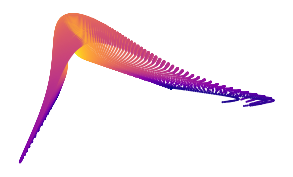

In [13]:
pca = reduction.PCA(state_space, scaling='level', n_components=3)
PCs = pca.transform(state_space)
PC_sources = pca.transform(state_space_sources, nocenter=True)

fig = plt.figure(figsize=(5, 3))
plt.scatter(PCs[:, 0], PCs[:, 1], c=state_space[:,0], s=1, cmap='plasma')
plt.axis("tight")
plt.xticks([]), plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('../figures/syngas-air-steady-flamelet-level-scaling.png', dpi=200, bbox_inches='tight')

<a id=reacting-flow-2D--1to1></a>
### Visualize 2D PCA projection resulting from $\langle -1, 1 \rangle$ scaling only

[Go to the top](#top-page)

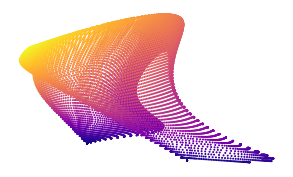

In [14]:
pca = reduction.PCA(state_space, scaling='-1to1', n_components=2)
PCs = pca.transform(state_space)
PC_sources = pca.transform(state_space_sources, nocenter=True)

fig = plt.figure(figsize=(5, 3))
plt.scatter(PCs[:, 0], PCs[:, 1], c=state_space[:,0], s=1, cmap='plasma')
plt.axis("tight")
plt.xticks([]), plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('../figures/syngas-air-steady-flamelet--1to1-scaling.png', dpi=200, bbox_inches='tight')

<a id=reacting-flow-2D-vast></a>
### Visualize 2D PCA projection resulting from VAST scaling only

[Go to the top](#top-page)

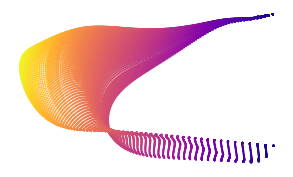

In [15]:
pca = reduction.PCA(state_space, scaling='vast', n_components=3)
PCs = pca.transform(state_space)
PC_sources = pca.transform(state_space_sources, nocenter=True)

fig = plt.figure(figsize=(5, 3))
plt.scatter(PCs[:, 0], PCs[:, 1], c=state_space[:,0], s=1, cmap='plasma')
plt.axis("tight")
plt.xticks([]), plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('../figures/syngas-air-steady-flamelet-vast-scaling.png', dpi=200, bbox_inches='tight')

<a id=reacting-flow-ranking></a>
### Visualize rankings of different data preprocessing strategies

[Go to the top](#top-page)

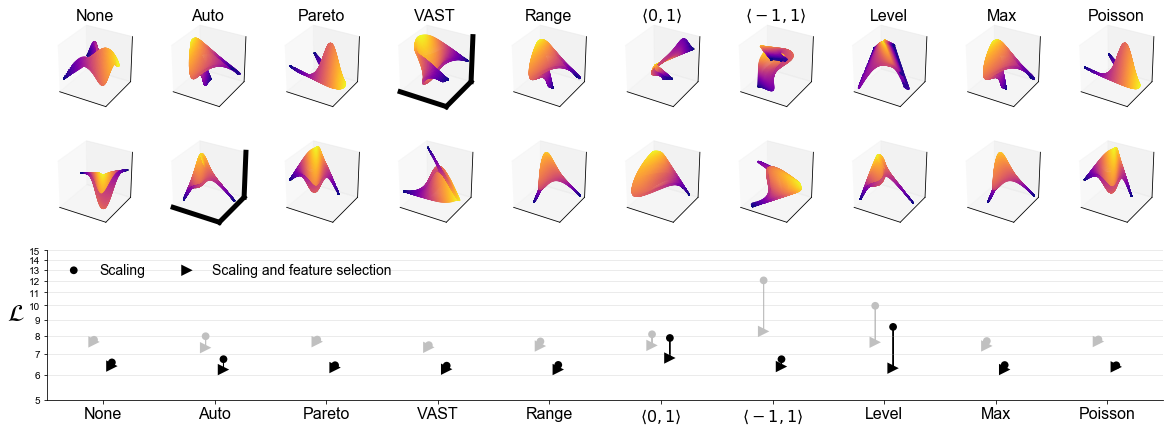

In [16]:
fig = plt.figure(figsize=(len(tex_scalings_list)*2, 7))
fig.tight_layout(pad=-30)
spec = fig.add_gridspec(ncols=len(tex_scalings_list), nrows=3)
widths = [1 for i in tex_scalings_list]
heights = [1, 1, 1.6]
spec = fig.add_gridspec(ncols=len(tex_scalings_list), nrows=3, width_ratios=widths, height_ratios=heights)
marker_scale_legend = 1

x_range = np.array([i for i in range(0,len(tex_scalings_list))])

for i, scaling in enumerate(scalings_list):

    pca = reduction.PCA(state_space, scaling=scaling, n_components=3)
    PCs = pca.transform(state_space)
    PC_sources = pca.transform(state_space_sources, nocenter=True)

    ax = fig.add_subplot(spec[0,i:i+1], projection='3d')
    ax.scatter(PCs[:,0], PCs[:,1], PCs[:,2], c=state_space[:,0], s=0.5, cmap='plasma')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.set_title(tex_scalings_list[i], fontsize=16)
    if i==best_scaling_3D:
        for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
            axis.line.set_linewidth(5)

    subset_pca = reduction.PCA(state_space[:,selected_variables_backward_3D[i]], scaling=scaling, n_components=3)
    subset_PCs = subset_pca.transform(state_space[:,selected_variables_backward_3D[i]])
    subset_PC_sources = subset_pca.transform(state_space_sources[:,selected_variables_backward_3D[i]], nocenter=True)
    ax = fig.add_subplot(spec[1,i:i+1], projection='3d')
    ax.scatter(subset_PCs[:,0], subset_PCs[:,1], subset_PCs[:,2], c=state_space[:,0], s=0.5, cmap='plasma')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    if i==best_subset_backward_3D:
        for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
            axis.line.set_linewidth(5)

ax = fig.add_subplot(spec[2,0:len(tex_scalings_list)])

offset = 0.08

plt.scatter(x_range + offset, costs_pure_scaling_3D, c='k', marker='o', s=60, edgecolor='none', alpha=1, zorder=2, label='Scaling')
plt.scatter(x_range + offset, costs_subsetting_backward_3D, c='k', marker='>', s=130, edgecolor='none', alpha=1, zorder=2, label='Scaling and feature selection')

plt.scatter(x_range - offset, costs_pure_scaling_2D, c='#c0c0c0', marker='o', s=60, edgecolor='none', alpha=1, zorder=2)
plt.scatter(x_range - offset, costs_subsetting_backward_2D, c='#c0c0c0', marker='>', s=130, edgecolor='none', alpha=1, zorder=2)
plt.xticks(x_range, tex_scalings_list, fontsize=16)

plt.grid(alpha=0.3, zorder=0)
plt.xlim([-0.5,len(tex_scalings_list)-0.5])

ax.set_yscale('log')
ax.set_yticks([5,6,7,8,9,10,11,12,13,14,15])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim([5,15])
plt.ylabel('$\mathcal{L}$', fontsize=24, rotation=0, horizontalalignment='right')

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(True)

lgnd = plt.legend(ncol=4, fontsize=14, markerscale=marker_scale_legend, loc="upper left", frameon=False)

for i in range(0, len(tex_scalings_list)):

    dy = costs_subsetting_backward_2D[i] - costs_pure_scaling_2D[i]
    plt.arrow(x_range[i] - offset, costs_pure_scaling_2D[i], 0, dy, color='#c0c0c0', ls='-', lw=1, zorder=1)
    
    dy = costs_subsetting_backward_3D[i] - costs_pure_scaling_3D[i]
    plt.arrow(x_range[i] + offset, costs_pure_scaling_3D[i], 0, dy, color='k', ls='-', lw=1, zorder=1)

plt.savefig('../figures/scalings-ranking-syngas-air-steady-flamelet.png', dpi=200, bbox_inches='tight')

***